## Exer 1.1: PCA: 2-dimensional Toy Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

(a) Load the dataset pca-data-2d.dat and create a scatter plot of the centered data.

In [2]:
data = []
with open('pca-data-2d.dat', 'r') as f:
    lines = f.readlines()
    for line in lines:
        k = line.rstrip().split()
        data.append([float(d) for d in k])
        
data = np.array(data)


In [3]:
c_data = data - np.mean(data,axis=0)
c_data

array([[ 0.49, -0.69],
       [-1.21,  1.31],
       [ 0.99, -0.39],
       [ 0.29, -0.09],
       [ 1.09, -1.29],
       [ 0.79, -0.49],
       [-0.31, -0.19],
       [-0.81,  0.81],
       [-0.31,  0.31],
       [-1.01,  0.71]])

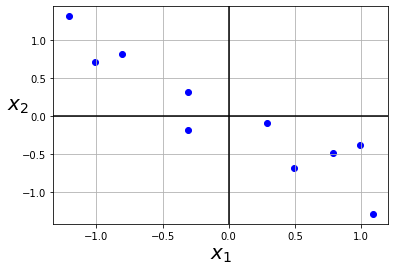

In [5]:
plt.scatter(c_data[:,0], c_data[:,1],color = 'b')
plt.grid()
plt.xlabel(r'$x_1$', fontsize=20);
plt.ylabel(r'$x_2$', fontsize=20, rotation='horizontal');
plt.axhline(0, color='black');
plt.axvline(0, color='black');

(b) Determine the Principal Components (PCs) and create another scatter plot of the same data points in the coordinate system spanned by the 2 PCs.

In [6]:
# Cov matrix
cov_data = np.cov(c_data.T)

In [7]:
# Eigendecomposition
eigen_val, eigen_vec = np.linalg.eig(cov_data)
print('eigenvalue :\n', eigen_val)
print('\neigenvector :\n', eigen_vec)

eigenvalue :
 [1.28402771 0.0490834 ]

eigenvector :
 [[ 0.73517866  0.6778734 ]
 [-0.6778734   0.73517866]]


In [8]:
# projection to eigenvetors
z3 = eigen_vec[0] * c_data
z4 = eigen_vec[1] * c_data

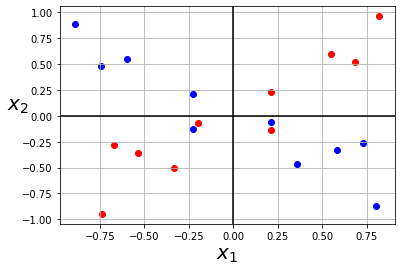

In [9]:
plt.scatter(z3[:,0], z3[:,1],color = 'b')
plt.scatter(z4[:,0], z4[:,1],color = 'r')
plt.grid()
plt.xlabel(r'$x_1$', fontsize=20);
plt.ylabel(r'$x_2$', fontsize=20, rotation='horizontal');
plt.axhline(0, color='black');
plt.axvline(0, color='black');

In [10]:
eigen_vec[1]

array([-0.6778734 ,  0.73517866])

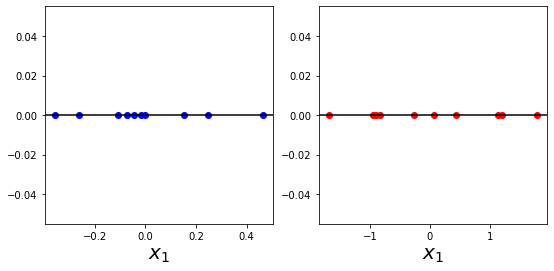

In [11]:
fig, axs = plt.subplots(1,2,figsize=(9,4))
colors = ['b', 'r']
for j in range(2):
    data = []
    data.append([np.matmul(eigen_vec[j].T ,c_data[i]) for i in range(10)])
    plt.sca(axs[j])
    plt.scatter(data, np.zeros(10),color = colors[j])
    plt.xlabel(r'$x_1$', fontsize=20);
   # plt.ylabel(r'$x_2$', fontsize=20, rotation='horizontal');
    plt.axhline(0, color='black');

(c) PCA can be used to compress data e.g. using only information contained in the first M out of N PCs. Plot the reconstruction of the data in the original coordinate system when using
(i) only the first or (ii) only the second PC for reconstruction.

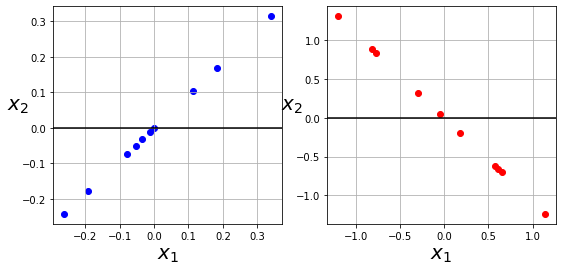

In [13]:
fig, axs = plt.subplots(1,2,figsize=(9,4))
colors = ['b', 'r']
for j in range(2):
    z = []
    z.append([np.matmul(c_data[i], eigen_vec[j].T) for i in range(10)])
    # reconstruction x = XVV.T
    data = (eigen_vec[j][:,np.newaxis] *  z ).T
    plt.sca(axs[j])
    plt.scatter(data[:,0], data[:,1],color = colors[j])
    plt.xlabel(r'$x_1$', fontsize=20);
    plt.ylabel(r'$x_2$', fontsize=20, rotation='horizontal');
    plt.axhline(0, color='black');
    plt.grid()